In [1]:
from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt
import h5py
import pandas as pd

import pyjet

In [2]:
import fastjet as fj

In [3]:
f = h5py.File('events_LHCO2020_backgroundMC_Pythia.h5','r')
f.keys()
dset = f['df']
dset.keys()
data = dset['block0_values']
data

<HDF5 dataset "block0_values": shape (1000000, 2100), type "<f8">

In [29]:
qcd_data = pd.read_hdf('events_LHCO2020_backgroundMC_Pythia.h5')
sig_data = pd.read_hdf('events_LHCO2020_BlackBox1.h5')

# Load files
#fn_qcd =  'events_LHCO2020_backgroundMC_Pythia.h5'
#f_qcd = h5py.File(fn_qcd,'r')
#qcd_data = f_qcd["table"].value

#fn_sig =  'events_LHCO2020_BlackBox1.h5'
#f_sig = h5py.File(fn_sig,'r')
#sig_data = f_sig["table"].value

#print(qcd_data.shape) # Event / Constituent in Event / pT eta phj

#reread.iloc[0:10,0:10]

#for i in range(10):
#    print(reread.at[i,1])
#reread.shape[1]

In [30]:
def run(data,n_events=1000):
    
    out = []
    
    # Loop over events
    for ievt in range(n_events):

        # Build a list of all particles
        pjs = []
        for i in range(int(data.shape[1]/3)):
            pj = fj.PseudoJet()
            pj.reset_PtYPhiM(data.at[ievt,3*i+0],data.at[ievt,3*i+1],data.at[ievt,3*i+2],0)
            pjs.append(pj)

        # run jet clustering with AntiKt, R=1.0
        R = 1.0
        jet_def = fj.JetDefinition(fj.antikt_algorithm, R)

        # Save the two leading jets
        jets = jet_def(pjs)
        jets = [j for j in jets if j.pt()>30.]
        out.append([jets[0],jets[1]])
                
    return out

In [31]:
# Actually run
# (this may take a few minutes)
out_qcd = run(qcd_data)
out_sig = run(sig_data)

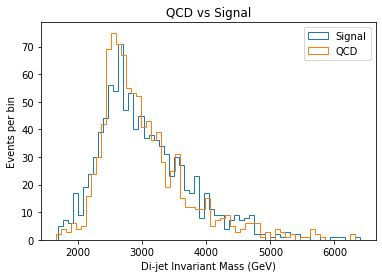

In [43]:
# Extract the leading dijet mass for signal..
dijet_m_sig = []
for evt in out_sig:
    dijet_m_sig.append( (evt[0]+evt[1]).m())

# ..and background
dijet_m_qcd = []
for evt in out_qcd:
    dijet_m_qcd.append( (evt[0]+evt[1]).m())

# and plot
_ = plt.hist(dijet_m_sig,label="Signal",bins=60,histtype='step')
_ = plt.hist(dijet_m_qcd,label="QCD",bins=60,histtype='step')
plt.legend()
plt.title('QCD vs Signal')
plt.xlabel('Di-jet Invariant Mass (GeV)')
plt.ylabel('Events per bin')
plt.savefig('QCD_sig_old.png')